In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [27]:
df=pd.read_csv(r"C:\Users\Gaurav\Desktop\Raj\combined test train data.csv")

In [28]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [29]:
df = df.sample(frac=1, axis=1).reset_index(drop=True)

In [30]:
df.head()

,label,text
0,0,I grew up (b. 1965) watching and loving the Th...
1,0,"When I put this movie in my DVD player, and sa..."
2,0,Why do people who do not know what a particula...
3,0,Even though I have great interest in Biblical ...
4,1,Im a die hard Dads Army fan and nothing will e...


In [31]:
df.groupby('label').count() #to check dataset is balanced or not

,text
label,
0,22514
1,22486


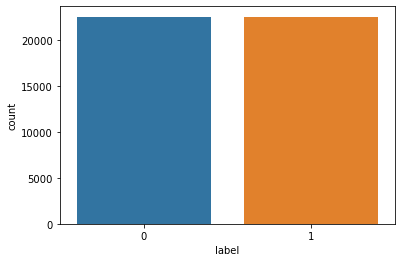

In [32]:
import seaborn as sns #optional
sns.countplot(df['label'])
plt.show()

In [33]:
x_train,x_test,y_train,y_test= train_test_split(df['text'],df['label'],test_size=0.2)

In [34]:
vocab_size=600
oov_tok='<OOV>'

In [35]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(x_train)

In [36]:
wordIndex=token.word_index
sequences=token.texts_to_sequences(x_train)
train_padded_seq=pad_sequences(sequences,maxlen=60,padding='post',truncating='post')

In [37]:
#testing data
test_sequences=token.texts_to_sequences(x_test)
test_padded_seq=pad_sequences(test_sequences,maxlen=60,padding='post',truncating='post')

In [38]:
#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=60),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            9600      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [40]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [42]:
earlyStop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
history=model.fit(train_padded_seq,y_train,validation_data=(test_padded_seq,y_test),epochs=10,callbacks=[earlyStop])

Train on 36000 samples, validate on 9000 samples
Epoch 1/10
36000/36000 [==============================] - 3s 73us/sample - loss: 0.6173 - accuracy: 0.7428 - val_loss: 0.6292 - val_accuracy: 0.7068
Epoch 2/10
36000/36000 [==============================] - 3s 83us/sample - loss: 0.6165 - accuracy: 0.7466 - val_loss: 0.6291 - val_accuracy: 0.7190
Epoch 3/10
36000/36000 [==============================] - 3s 73us/sample - loss: 0.6167 - accuracy: 0.7457 - val_loss: 0.6332 - val_accuracy: 0.6891
Epoch 4/10
36000/36000 [==============================] - 3s 73us/sample - loss: 0.6156 - accuracy: 0.7485 - val_loss: 0.6298 - val_accuracy: 0.7270


In [43]:
model.evaluate(test_padded_seq, y_test)

9000/9000 [==============================] - 0s 33us/sample - loss: 0.6298 - accuracy: 0.7270


[0.6298231820530361, 0.727]